In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
from keras.utils import plot_model
from keras.models import Sequential, load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
number_of_samples = 50000

In [5]:
data_attack = pd.read_csv('/content/drive/My Drive/dataset_attack.csv',nrows = number_of_samples)
data_normal = pd.read_csv('/content/drive/My Drive/dataset_normal.csv',nrows = number_of_samples)

In [6]:
print(data_attack.head(10))
print(data_normal.head(10))

   frame.encap_type                  frame.len  ...  tcp.window_size  tcp.time_delta
1               212  eth:ethertype:ip:udp:data  ...              0.0          attack
1               212  eth:ethertype:ip:udp:data  ...              0.0          attack
1               212  eth:ethertype:ip:udp:data  ...              0.0          attack
1               212  eth:ethertype:ip:udp:data  ...              0.0          attack
1                62  eth:ethertype:ip:udp:data  ...              0.0          attack
1               212  eth:ethertype:ip:udp:data  ...              0.0          attack
1               212  eth:ethertype:ip:udp:data  ...              0.0          attack
1               212  eth:ethertype:ip:udp:data  ...              0.0          attack
1               212  eth:ethertype:ip:udp:data  ...              0.0          attack
1                62  eth:ethertype:ip:udp:data  ...              0.0          attack

[10 rows x 29 columns]
   frame.encap_type                 frame

In [7]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [8]:
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)

In [9]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [10]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [11]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [12]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1

In [13]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size = 0.2)

In [15]:
def create_baseline():
    # create the model
    model = Sequential()
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
model = create_baseline()

In [17]:
Y_train = np.asarray(Y_train).astype(np.float32)

In [18]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 500,verbose = 1)

Epoch 1/500
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4463 - accuracy: 0.7988 - val_loss: 0.4152 - val_accuracy: 0.8066
Epoch 2/500
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4015 - accuracy: 0.8134 - val_loss: 0.3908 - val_accuracy: 0.8205
Epoch 3/500
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3812 - accuracy: 0.8275 - val_loss: 0.3762 - val_accuracy: 0.8253
Epoch 4/500
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3710 - accuracy: 0.8309 - val_loss: 0.3718 - val_accuracy: 0.8290
Epoch 5/500
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3651 - accuracy: 0.8319 - val_loss: 0.3636 - val_accuracy: 0.8323
Epoch 6/500
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3597 - accuracy: 0.8341 - val_loss: 0.3580 - val_accuracy: 0.8323
Epoch 7/500
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3551 - accuracy: 0.8349 - val_loss: 0.3544 - val_ac

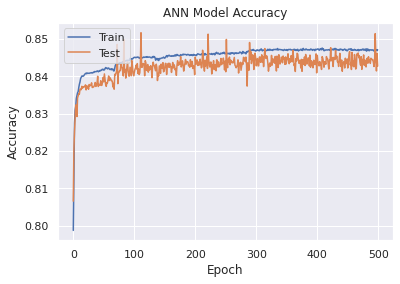

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('ANN Model Accuracy.png')
plt.show()

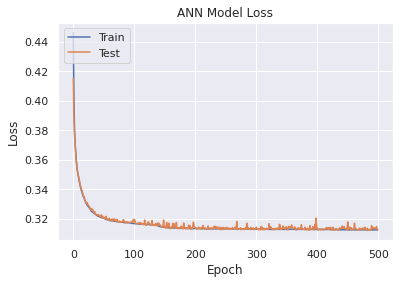

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('ANN Model loss.png')
plt.show()

In [21]:
predict = model.predict(X_test, verbose=1)

625/625 [==============================] - 1s 2ms/step


In [22]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

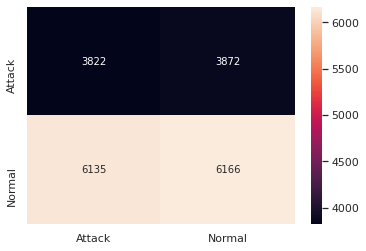

In [23]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [25]:
model.save('/content/drive/My Drive/ann_model.h5')

In [26]:
Y_test = np.asarray(Y_test).astype(np.float32)

In [27]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.28%
